In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('/content/brasil-real-estate.csv')
df.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37"
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45"
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  object 
 1   place_with_parent_names  12834 non-null  object 
 2   region                   12834 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  12834 non-null  float64
 5   price_usd                12834 non-null  object 
dtypes: float64(1), object(5)
memory usage: 601.7+ KB


In [ ]:
df=df.drop_duplicates()
df[df.duplicated()]

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12000 non-null  object 
 1   place_with_parent_names  12000 non-null  object 
 2   region                   12000 non-null  object 
 3   lat-lon                  10733 non-null  object 
 4   area_m2                  12000 non-null  float64
 5   price_usd                12000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 656.2+ KB


In [ ]:
#Cleaning data - split lattitude - longtitude into 2 columns
df[['lat', 'lon']] = df['lat-lon'].str.split(',', expand = True)
df.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85",-9.6443051,-35.7088142
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37",-9.6430934,-35.70484
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45",-9.6227033,-35.7297953
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20",-9.622837,-35.719556
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71",-9.654955,-35.700227


In [ ]:
#Change data type from Object to Float
df[['lat', 'lon']]= df[['lat', 'lon']].astype(float)
df[['lat', 'lon']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 12833
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     10733 non-null  float64
 1   lon     10733 non-null  float64
dtypes: float64(2)
memory usage: 281.2 KB


In [ ]:
#drop column
df.drop(columns='lat-lon',inplace=True)
df.head()

,property_type,place_with_parent_names,region,area_m2,price_usd,lat,lon
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,110.0,"$187,230.85",-9.644305,-35.708814
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,65.0,"$81,133.37",-9.643093,-35.704840
2,house,|Brasil|Alagoas|Maceió|,Northeast,211.0,"$154,465.45",-9.622703,-35.729795
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,99.0,"$146,013.20",-9.622837,-35.719556
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,55.0,"$101,416.71",-9.654955,-35.700227


In [ ]:
# change data type of price_usd
#df["price_usd"] = df["price_usd"].str.replace("$","").str.replace(",","").astype(float)
df['price_usd']=df['price_usd'].str.replace('$','').str.replace(',','').astype(float)
df.head()

<ipython-input-8-43429804a855>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price_usd']=df['price_usd'].str.replace('$','').str.replace(',','').astype(float)


,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,187230.85,-9.644305,-35.708814
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,81133.37,-9.643093,-35.704840
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,154465.45,-9.622703,-35.729795
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,146013.20,-9.622837,-35.719556
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,101416.71,-9.654955,-35.700227


In [ ]:
# split data in Place of parent names
#df["state"] = df["place_with_parent_names"].str.split("|", expand = True)[2]
df[['state','city']]=df['place_with_parent_names'].str.split('|',expand=True)[[2,3]]
df

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state,city
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,187230.85,-9.644305,-35.708814,Alagoas,Maceió
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,81133.37,-9.643093,-35.704840,Alagoas,Maceió
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,154465.45,-9.622703,-35.729795,Alagoas,Maceió
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,146013.20,-9.622837,-35.719556,Alagoas,Maceió
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,101416.71,-9.654955,-35.700227,Alagoas,Maceió
...,...,...,...,...,...,...,...,...,...,...
12829,apartment,|Brasil|Pernambuco|Recife|,Northeast,"-8.056418,-34.909309",91.0,174748.79,-8.056418,-34.909309,Pernambuco,Recife
12830,apartment,|Brasil|Pernambuco|Recife|,Northeast,"-8.1373477,-34.909181",115.0,115459.02,-8.137348,-34.909181,Pernambuco,Recife
12831,apartment,|Brasil|Pernambuco|Recife|Boa Viagem|,Northeast,"-8.1136717,-34.896252",76.0,137302.62,-8.113672,-34.896252,Pernambuco,Recife
12832,apartment,|Brasil|Pernambuco|Recife|Boa Viagem|,Northeast,NaN,130.0,234038.56,NaN,NaN,Pernambuco,Recife


In [ ]:
df.drop(columns='place_with_parent_names', inplace=True)
#del df['place_with_parent_names']
df

,property_type,region,lat-lon,area_m2,price_usd,lat,lon,state,city
0,apartment,Northeast,"-9.6443051,-35.7088142",110.0,187230.85,-9.644305,-35.708814,Alagoas,Maceió
1,apartment,Northeast,"-9.6430934,-35.70484",65.0,81133.37,-9.643093,-35.704840,Alagoas,Maceió
2,house,Northeast,"-9.6227033,-35.7297953",211.0,154465.45,-9.622703,-35.729795,Alagoas,Maceió
3,apartment,Northeast,"-9.622837,-35.719556",99.0,146013.20,-9.622837,-35.719556,Alagoas,Maceió
4,apartment,Northeast,"-9.654955,-35.700227",55.0,101416.71,-9.654955,-35.700227,Alagoas,Maceió
...,...,...,...,...,...,...,...,...,...
12829,apartment,Northeast,"-8.056418,-34.909309",91.0,174748.79,-8.056418,-34.909309,Pernambuco,Recife
12830,apartment,Northeast,"-8.1373477,-34.909181",115.0,115459.02,-8.137348,-34.909181,Pernambuco,Recife
12831,apartment,Northeast,"-8.1136717,-34.896252",76.0,137302.62,-8.113672,-34.896252,Pernambuco,Recife
12832,apartment,Northeast,NaN,130.0,234038.56,NaN,NaN,Pernambuco,Recife


In [ ]:
#extract file after preprocessing
file = df.to_csv("file_cleaned.csv")

EDA with python

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat= df["lat"],
    lon=df["lon"],
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [ ]:
#count column of state
df['state'].value_counts()

Minas Gerais          2953
Paraná                2606
Bahia                 1917
Ceará                 1687
Distrito Federal       780
Espírito Santo         590
Goiás                  575
Pará                   295
Paraíba                251
Maranhão               105
Pernambuco             101
Mato Grosso             91
Alagoas                 27
Mato Grosso do Sul      17
Amazonas                 4
Amapá                    1
Name: state, dtype: int64

In [ ]:
df[['area_m2','price_usd']].describe()

,area_m2,price_usd
count,12000.000000,12000.000000
mean,116.928083,181927.041722
std,48.363866,96665.890581
min,53.000000,74892.340000
25%,78.000000,109217.990000
50%,105.000000,152905.190000
75%,145.000000,224677.020000
max,252.000000,524246.390000


In [ ]:
df.corr()

<ipython-input-41-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,area_m2,price_usd,lat,lon
area_m2,1.000000,0.589376,0.020282,-0.008835
price_usd,0.589376,1.000000,0.057920,0.084776
lat,0.020282,0.057920,1.000000,0.643211
lon,-0.008835,0.084776,0.643211,1.000000


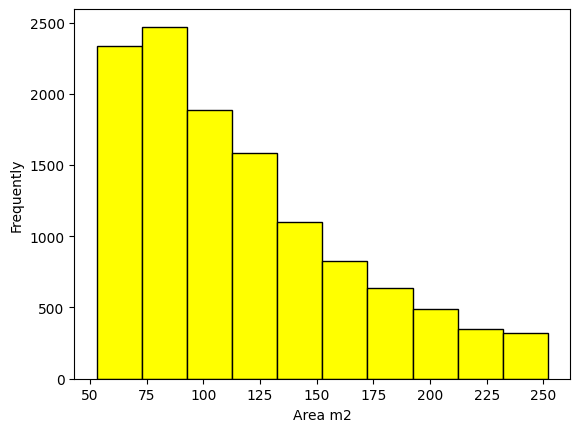

In [ ]:
#Check distribution of data (histogram)
plt.hist(df["area_m2"], color = 'yellow', edgecolor = 'black')
plt.xlabel("Area m2")
plt.ylabel("Frequently")
plt.show()

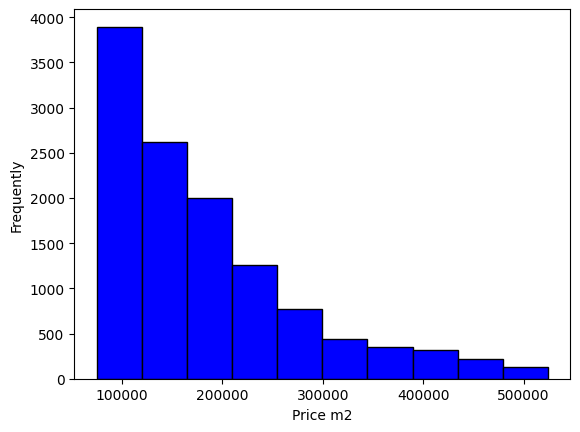

In [ ]:
#Check distribution of data (histogram)
plt.hist(df["price_usd"], color = 'blue', edgecolor = 'black')
plt.xlabel("Price m2")
plt.ylabel("Frequently")
plt.show()

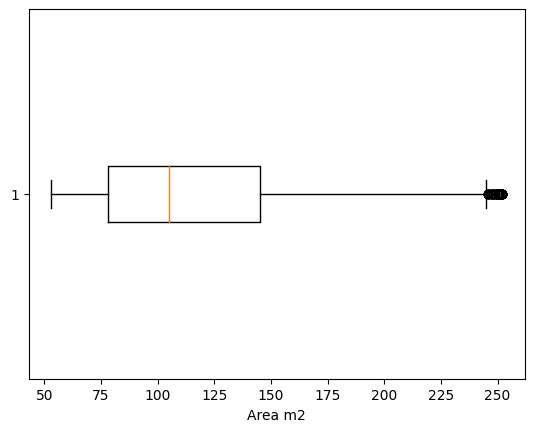

In [ ]:
#Check boxplot
plt.boxplot(df["area_m2"], vert = False)
plt.xlabel("Area m2")
plt.show()

In [ ]:
#P1
df1=pd.read_csv('/content/mexico-real-estate-1.csv')
df1.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,"$67,965.56"
1,house,Nuevo León,25.688436,-100.198807,186.0,"$63,223.78"
2,apartment,Guerrero,16.767704,-99.764383,82.0,"$84,298.37"
3,apartment,Guerrero,16.829782,-99.911012,150.0,"$94,308.80"
4,house,Veracruz de Ignacio de la Llave,NaN,NaN,175.0,"$94,835.67"


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        700 non-null    float64
 5   price_usd      700 non-null    object 
dtypes: float64(3), object(3)
memory usage: 32.9+ KB


In [ ]:
#drop null value
df1.dropna(inplace= True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  583 non-null    object 
 1   state          583 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        583 non-null    float64
 5   price_usd      583 non-null    object 
dtypes: float64(3), object(3)
memory usage: 31.9+ KB


In [ ]:
# change data type of price_usd
df1['price_usd']=df1['price_usd'].str.replace('$','').str.replace(',','').astype(float)
df1.head()

<ipython-input-20-8f3d3985ed25>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
5,house,Yucatán,21.052583,-89.538639,205.0,105191.37


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  583 non-null    object 
 1   state          583 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        583 non-null    float64
 5   price_usd      583 non-null    float64
dtypes: float64(4), object(2)
memory usage: 31.9+ KB


In [ ]:
df2=pd.read_csv('/content/mexico-real-estate-2.csv')
df2.head()

,property_type,state,lat,lon,area_m2,price_mxn
0,apartment,Nuevo León,25.721081,-100.345581,72.0,1300000.0
1,apartment,Puebla,NaN,NaN,190.0,2500000.0
2,house,Morelos,23.634501,-102.552788,360.0,5300000.0
3,house,Morelos,NaN,NaN,76.0,820000.0
4,house,Puebla,NaN,NaN,200.0,1100000.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        700 non-null    float64
 5   price_mxn      700 non-null    float64
dtypes: float64(4), object(2)
memory usage: 32.9+ KB


In [ ]:
df2.dropna(inplace= True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  571 non-null    object 
 1   state          571 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        571 non-null    float64
 5   price_mxn      571 non-null    float64
dtypes: float64(4), object(2)
memory usage: 31.2+ KB


In [ ]:
#rename column
df2=df2.rename(columns={'price_mxn':'price_usd'})
df2.head()

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72.0,1300000.0
2,house,Morelos,23.634501,-102.552788,360.0,5300000.0
6,apartment,Estado de México,19.272040,-99.572013,85.0,1250000.0
7,house,San Luis Potosí,22.138882,-100.996510,158.0,2120000.0
8,apartment,Distrito Federal,19.394558,-99.129707,65.0,758190.0


In [ ]:
df3=pd.read_csv('/content/mexico-real-estate-3.csv')
df3.head()

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71.0,48550.59
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233.0,168636.73
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300.0,86932.69
3,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275.0,263432.41
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84.0,68508.67


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            700 non-null    object 
 1   place_with_parent_names  700 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  700 non-null    float64
 4   price_usd                700 non-null    float64
dtypes: float64(2), object(3)
memory usage: 27.5+ KB


In [ ]:
df3.dropna(inplace=True)
df3.head()

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71.0,48550.59
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233.0,168636.73
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300.0,86932.69
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84.0,68508.67
5,house,|México|Jalisco|Guadalajara|,"20.689157,-103.366728",175.0,102763.00


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            582 non-null    object 
 1   place_with_parent_names  582 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  582 non-null    float64
 4   price_usd                582 non-null    float64
dtypes: float64(2), object(3)
memory usage: 27.3+ KB


In [ ]:
#split lattitude - longtitude into 2 columns
df3[['lat', 'lon']] = df3['lat-lon'].str.split(',', expand = True)
df3.head()

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71.0,48550.59,19.52589,-99.151703
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233.0,168636.73,19.2640539,-99.5727534
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300.0,86932.69,19.268629,-99.671722
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84.0,68508.67,19.511938,-96.871956
5,house,|México|Jalisco|Guadalajara|,"20.689157,-103.366728",175.0,102763.00,20.689157,-103.366728


In [ ]:
#df.drop(columns='place_with_parent_names', inplace=True)
del df3['lat-lon']
df3

,property_type,place_with_parent_names,area_m2,price_usd,lat,lon
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,71.0,48550.59,19.52589,-99.151703
1,house,|México|Estado de México|Toluca|Metepec|,233.0,168636.73,19.2640539,-99.5727534
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,300.0,86932.69,19.268629,-99.671722
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,84.0,68508.67,19.511938,-96.871956
5,house,|México|Jalisco|Guadalajara|,175.0,102763.00,20.689157,-103.366728
...,...,...,...,...,...,...
695,house,|México|Jalisco|Tlajomulco de Zúñiga|Tlajomulc...,175.0,121178.91,20.532264,-103.484418
696,house,|México|Morelos|Jiutepec|,100.0,47417.83,18.9289862,-99.1802147
697,house,|México|Yucatán|Mérida|,81.0,39524.23,21.0284038368,-89.6530058049
698,house,|México|San Luis Potosí|San Luis Potosí|,360.0,245050.24,22.11830417,-101.0321938992


In [ ]:
# split data in Place of parent names
df3["state"] = df3["place_with_parent_names"].str.split("|", expand = True)[2]
del df3['place_with_parent_names']
df3.head()

,property_type,lat-lon,area_m2,price_usd,lat,lon,state
0,apartment,"19.52589,-99.151703",71.0,48550.59,19.52589,-99.151703,Distrito Federal
1,house,"19.2640539,-99.5727534",233.0,168636.73,19.2640539,-99.5727534,Estado de México
2,house,"19.268629,-99.671722",300.0,86932.69,19.268629,-99.671722,Estado de México
4,apartment,"19.511938,-96.871956",84.0,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave
5,house,"20.689157,-103.366728",175.0,102763.00,20.689157,-103.366728,Jalisco


In [ ]:
df3[['lat', 'lon']]=df3[['lat', 'lon']].astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  582 non-null    object 
 1   lat-lon        582 non-null    object 
 2   area_m2        582 non-null    float64
 3   price_usd      582 non-null    float64
 4   lat            582 non-null    float64
 5   lon            582 non-null    float64
 6   state          582 non-null    object 
dtypes: float64(4), object(3)
memory usage: 36.4+ KB


In [ ]:
df4=df1.append(df2).append(df3)  #append by name of Column, no matter the order of column
df4

<ipython-input-33-4b7ecc75a3f7>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-33-4b7ecc75a3f7>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,property_type,state,lat,lon,area_m2,price_usd,lat-lon
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56,NaN
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78,NaN
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37,NaN
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80,NaN
5,house,Yucatán,21.052583,-89.538639,205.0,105191.37,NaN
...,...,...,...,...,...,...,...
695,house,Jalisco,20.532264,-103.484418,175.0,121178.91,"20.532264,-103.484418"
696,house,Morelos,18.928986,-99.180215,100.0,47417.83,"18.9289862,-99.1802147"
697,house,Yucatán,21.028404,-89.653006,81.0,39524.23,"21.0284038368,-89.6530058049"
698,house,San Luis Potosí,22.118304,-101.032194,360.0,245050.24,"22.11830417,-101.0321938992"


In [ ]:
#extract file after preprocessing
df4.to_csv("Mexico_cleaned.csv")

In [ ]:
df4.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
5,house,Yucatán,21.052583,-89.538639,205.0,105191.37


In [ ]:
#P2a
df4.groupby('state')['property_type'].count().reset_index().sort_values('property_type',ascending=True)

,state,property_type
29,Zacatecas,2
17,Oaxaca,2
3,Campeche,3
6,Colima,5
26,Tlaxcala,6
8,Durango,7
15,Nayarit,9
0,Aguascalientes,10
10,Guanajuato,12
23,Sonora,12


In [ ]:
# bang nào có giá bất động sản trung bình cao/thấp nhất?
df4.groupby('state')['price_usd'].mean().round(2).reset_index().sort_values('price_usd',ascending=False).head(3)

,state,price_usd
5,Chihuahua,1297784.38
20,Quintana Roo,1087940.60
11,Guerrero,1056229.67


In [ ]:
# diện tích trung bình các bđs theo loại là bao nhiêu?
df4.groupby('property_type')['area_m2'].mean().round(2).reset_index()

,property_type,area_m2
0,apartment,105.46
1,house,190.11


In [ ]:
#HW1
d1=pd.read_csv('/content/Top 50 Animation Movies and TV Shows.csv')
d1.head(2)

,Ranking,Name,Year,Minutes,genre,Rating,Votes
0,1.0,Big Mouth,(2017– ),30 min,"Animation, Comedy, Romance",7.9,"79,301"
1,2.0,The Bad Guys,(2022),100 min,"Animation, Adventure, Comedy",6.8,"37,335"


In [ ]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ranking  50 non-null     float64
 1   Name     50 non-null     object 
 2   Year     50 non-null     object 
 3   Minutes  46 non-null     object 
 4   genre    50 non-null     object 
 5   Rating   47 non-null     float64
 6   Votes    47 non-null     object 
dtypes: float64(2), object(5)
memory usage: 2.9+ KB


In [ ]:
d1.dropna(inplace=True)
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 49
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ranking  45 non-null     float64
 1   Name     45 non-null     object 
 2   Year     45 non-null     object 
 3   Minutes  45 non-null     object 
 4   genre    45 non-null     object 
 5   Rating   45 non-null     float64
 6   Votes    45 non-null     object 
dtypes: float64(2), object(5)
memory usage: 2.8+ KB


In [ ]:
d1['Votes']=d1['Votes'].str.replace(',','').astype(int)
d1.head(3)

,Ranking,Name,Year,Minutes,genre,Rating,Votes
0,1.0,Big Mouth,(2017– ),30 min,"Animation, Comedy, Romance",7.9,79301
1,2.0,The Bad Guys,(2022),100 min,"Animation, Adventure, Comedy",6.8,37335
3,4.0,Rick and Morty,(2013– ),23 min,"Animation, Adventure, Comedy",9.1,515315


In [ ]:
d1['Minutes']=d1['Minutes'].str.replace(' min','').astype(int)
d1.head(3)

,Ranking,Name,Year,Minutes,genre,Rating,Votes
0,1.0,Big Mouth,(2017– ),30,"Animation, Comedy, Romance",7.9,79301
1,2.0,The Bad Guys,(2022),100,"Animation, Adventure, Comedy",6.8,37335
3,4.0,Rick and Morty,(2013– ),23,"Animation, Adventure, Comedy",9.1,515315


In [ ]:
d1['Minutes'].sum()

2303

In [ ]:
d1.groupby('genre').agg({'Minutes':'sum','Votes':'sum'}).reset_index().sort_values('Minutes',ascending=True).head(3)

,genre,Minutes,Votes
9,"Animation, Family",7,10061
5,"Animation, Comedy, Drama",25,156050
7,"Animation, Comedy, Romance",30,79301


In [ ]:
d1['sub_genre']=d1['genre'].str[11:]
d1.head(3)

,Ranking,Name,Year,Minutes,genre,Rating,Votes,sub_genre
0,1.0,Big Mouth,(2017– ),30,"Animation, Comedy, Romance",7.9,79301,"Comedy, Romance"
1,2.0,The Bad Guys,(2022),100,"Animation, Adventure, Comedy",6.8,37335,"Adventure, Comedy"
3,4.0,Rick and Morty,(2013– ),23,"Animation, Adventure, Comedy",9.1,515315,"Adventure, Comedy"


In [ ]:
d1.groupby('sub_genre')['Rating'].mean().reset_index().sort_values('Rating',ascending=True).head(3)

,sub_genre,Rating
6,"Comedy, Family",5.833333
2,"Adventure, Comedy",7.470000
7,"Comedy, Romance",7.900000


In [ ]:
#HW 2
d2=pd.read_csv('/content/raw_titles.csv')
d2.head(3)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0


In [ ]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5806 non-null   int64  
 1   id                    5806 non-null   object 
 2   title                 5805 non-null   object 
 3   type                  5806 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 589.8+ KB


In [ ]:
d2.dropna(inplace=True)
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670 entries, 5 to 5796
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1670 non-null   int64  
 1   id                    1670 non-null   object 
 2   title                 1670 non-null   object 
 3   type                  1670 non-null   object 
 4   release_year          1670 non-null   int64  
 5   age_certification     1670 non-null   object 
 6   runtime               1670 non-null   int64  
 7   genres                1670 non-null   object 
 8   production_countries  1670 non-null   object 
 9   seasons               1670 non-null   float64
 10  imdb_id               1670 non-null   object 
 11  imdb_score            1670 non-null   float64
 12  imdb_votes            1670 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 182.7+ KB


In [ ]:
d2['imdb_score'].mean().round(2)

7.03

In [ ]:
d2.groupby('genres').agg({'imdb_score':'mean','imdb_votes':'mean'}).reset_index().head(3)

,genres,imdb_score,imdb_votes
0,"['action', 'animation', 'comedy', 'drama', 'fa...",4.8,635.0
1,"['action', 'animation', 'comedy', 'drama', 'fa...",6.6,993.0
2,"['action', 'animation', 'comedy', 'drama', 'fa...",6.3,188.0


In [ ]:
d3=d2.groupby('release_year').agg({'imdb_score':'mean','imdb_votes':'mean'}).reset_index()
d3.head()

,release_year,imdb_score,imdb_votes
0,1969,8.8,72895.0
1,1972,8.1,2144.0
2,1981,7.4,3514.0
3,1982,6.9,33760.0
4,1983,6.7,3126.0


In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
import matplotlib.pyplot as plt

<BarContainer object of 40 artists>

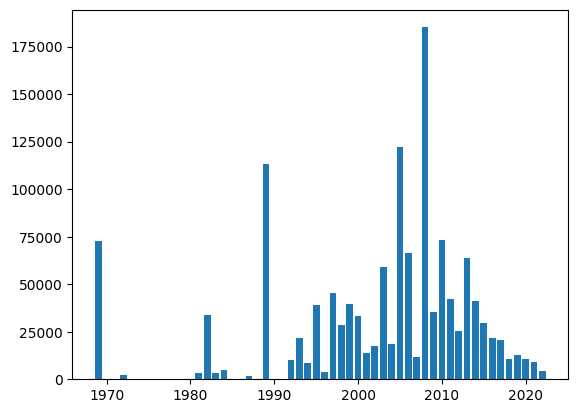

In [ ]:
#plt.bar(data_release_year['release_year'],data_release_year['imdb_votes'])
plt.bar(d3['release_year'],d3['imdb_votes'])

<BarContainer object of 40 artists>

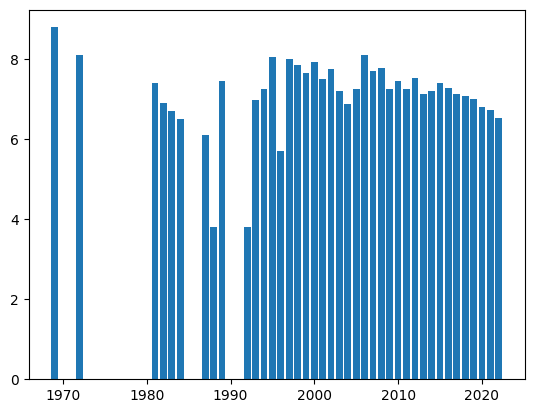

In [ ]:
plt.bar(d3['release_year'],d3['imdb_score'])